In [18]:
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns
 

In [19]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   score        350 non-null    object
 1   runs_scored  350 non-null    object
 2   balls_faced  350 non-null    object
 3   strike_rate  350 non-null    object
 4   fours        350 non-null    object
 5   sixes        350 non-null    object
 6   opposition   350 non-null    object
 7   ground       350 non-null    object
 8   date         350 non-null    object
 9   odi_number   350 non-null    object
dtypes: object(10)
memory usage: 27.5+ KB


In [20]:
# Data cleaning - Opposition name says 'v Aus' etc, we can remove 'v '
df['opposition'] = df['opposition'].apply(lambda x: x[2:])


In [21]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [22]:
# Add a 'feature' - 'year' column using the match date column
# First convert date column into datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True) 
df['year'] = df['date'].dt.year.astype(int)
print(df.head())


  score runs_scored balls_faced strike_rate fours sixes  opposition  \
0     0           0           1           0     0     0  Bangladesh   
1    12          12          11      109.09     2     0  Bangladesh   
2    7*           7           2         350     0     1  Bangladesh   
3     3           3           7       42.85     0     0    Pakistan   
4   148         148         123      120.32    15     4    Pakistan   

          ground       date  odi_number  year  
0     Chattogram 2004-12-23  ODI # 2199  2004  
1          Dhaka 2004-12-26  ODI # 2201  2004  
2          Dhaka 2004-12-27  ODI # 2202  2004  
3          Kochi 2005-04-02  ODI # 2235  2005  
4  Visakhapatnam 2005-04-05  ODI # 2236  2005  


In [24]:
# Create a column to distinguish between out and not out

# The apply method in Pandas allows you to apply a function to each element in a DataFrame or Series. In this case, the function being applied is str, which is the built-in Python function for converting values into strings. By applying str to each element in the 'score' column, we are converting the numerical or other data types in that column into string data types.
df['score'] = df['score'].apply(str) 
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


In [27]:
# dropping the odi_number feature because it adds no value to the analysis
df.drop(columns='odi_number', inplace=True)

# dropping those innings where Dhoni did not bat and storing in a new DataFrame 
# Take all the columns, starting with runs_scored
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]
print(df_new.head())

  runs_scored balls_faced strike_rate fours sixes  opposition         ground  \
0           0           1           0     0     0  Bangladesh     Chattogram   
1          12          11      109.09     2     0  Bangladesh          Dhaka   
2           7           2         350     0     1  Bangladesh          Dhaka   
3           3           7       42.85     0     0    Pakistan          Kochi   
4         148         123      120.32    15     4    Pakistan  Visakhapatnam   

        date  year  not_out  
0 2004-12-23  2004        0  
1 2004-12-26  2004        0  
2 2004-12-27  2004        1  
3 2005-04-02  2005        0  
4 2005-04-05  2005        0  


In [34]:
# fixing the data types of numerical columns 
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int) 
df_new['strike_rate'] = df_new['strike_rate'].astype(float) 
df_new['fours'] = df_new['fours'].astype(int) 
df_new['sixes'] = df_new['sixes'].astype(int)

In [29]:
# Career stats
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y') # first match
print('First match:', first_match_date)
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y') # last match
print('Last match:', last_match_date)
number_of_matches = df.shape[0] # number of mathces played in career
print('Number of matches played:', number_of_matches)
number_of_inns = df_new.shape[0] # number of innings
print('Number of innings played:', number_of_inns)
not_outs = df_new['not_out'].sum() # number of not outs in career
print('Not outs:', not_outs)
runs_scored = df_new['runs_scored'].sum() # runs scored in career
print('Runs scored in career:', runs_scored)
balls_faced = df_new['balls_faced'].sum() # balls faced in career
print('Balls faced in career:', balls_faced)
career_sr = (runs_scored / balls_faced)*100 # career strike rate
print('Career strike rate: {:.2f}'.format(career_sr))
career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
print('Career average: {:.2f}'.format(career_avg))

First match: December 23, 2004
Last match: July 09, 2019
Number of matches played: 350
Number of innings played: 297
Not outs: 84
Runs scored in career: 10773
Balls faced in career: 12303
Career strike rate: 87.56
Career average: 50.58


In [30]:
#highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(), 'date'].values[0]
#highest_score = df.loc[df.date == highest_score_date, 'score'].values[0] # highest score
highest_score = df_new['runs_scored'].max()
not_out_for_highest = (
    df_new[df_new['runs_scored'] == highest_score]['not_out']
    .replace([1, 0], ["*", ""])  # Replace 1 with *, 0 with null
    .iloc[0]
)
print('Highest score in career:', highest_score, not_out_for_highest)
hundreds = (df_new['runs_scored'] >= 100).sum()
# hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0] # number of 100s
print('Number of 100s:', hundreds)
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
# fifties = df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0] #number of 50s
print('Number of 50s:', fifties)
fours = df_new['fours'].sum() # number of fours in career
print('Number of 4s:', fours)
sixes = df_new['sixes'].sum() # number of sixes in career
print('Number of 6s:', sixes)

Highest score in career: 183 *
Number of 100s: 10
Number of 50s: 73
Number of 4s: 826
Number of 6s: 229


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


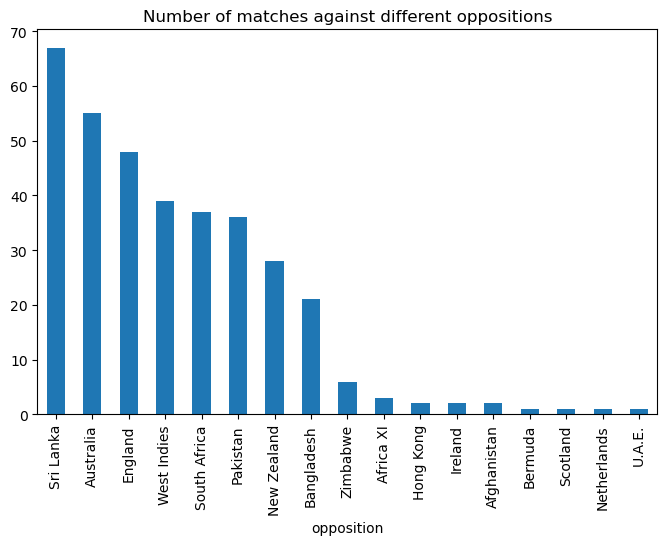

In [31]:
# number of matches played against different oppositions
# Count the occurrences of each unique value in the 'opposition' column
# opposition_counts will be a series with a labelled index as opposition
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)
# Plot the counts as a bar plot
opposition_counts.plot(kind='bar', title='Number of matches against different oppositions', figsize=(8, 5))
plt.show()